In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/renee/oriented_stacking/general_code/')
import matplotlib
import numpy as np
import os
from astropy.io import fits
import astropy.units as u
from astropy.cosmology import Planck18 as cosmo, z_at_value
import coop_post_processing as cpp
from scipy import ndimage
import coop_setup_funcs as csf
import warnings
from astropy.visualization import quantity_support
warnings.filterwarnings('ignore')
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=False)
# set plot params
import matplotlib as mpl
import scipy as sp
mpl.font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 3}
plt.rcParams.update({'font.size': 14})
mpl.rcParams['figure.figsize'] = [8.0, 6.0]
import healpy as hp

import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import stats as st
dir='/home/renee/oriented_stacking/dat/'

In [4]:
# Define the distance bins
dbins = [[893, 1393], [1493, 1993], [2093, 2593], [2693,3193]]
for dbin in dbins:
    print(z_at_value(cosmo.comoving_distance, (dbin[0]-50)*u.Mpc),z_at_value(cosmo.comoving_distance, (dbin[1]+50)*u.Mpc))

zbins = ['0pt20_0pt36', '0pt36_0pt53', '0pt53_0pt72', '0pt72_0pt94'] # the z bins for number density maps
#actpath  = "/mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/"
# buzzpath = "/mnt/scratch-lustre/mlokken/stacking/Buzzard_paper2/"
# mask =  "/mnt/raid-cita/mlokken/data/masks/y3_gold_2.2.1_RING_joint_redmagic_v0.5.1_wide_maglim_v2.2_mask_hpx_4096.fits"

0.19985555905328484 redshift 0.3565167560560754 redshift
0.3565167560560754 redshift 0.5289988643902372 redshift
0.5289988643902372 redshift 0.7215854982816572 redshift
0.7215854982816572 redshift 0.9396687416637612 redshift


## Before running anything involving $\delta_g$, get the $n_g$ means

In [3]:
# # for DES Maglim
# gmeans_des = []
# sigmas_des = []
# deg2_per_sr  = (np.pi*180)**2
# pix_per_ster = []
# avg_y_perpix = []
# for dbin in dbins:
#     c = 0
#     cl_dlow = dbin[0]
#     cl_dhi  = dbin[0]+100
#     dlow    = dbin[0]-50
#     dhi     = cl_dhi+50
#     with fits.open("/mnt/scratch-lustre/mlokken/stacking/desxDES_paper2/orient_by_maglim_75/stacks/0/ilc_SZ_deproj_cib_yy_4096_hpx_redmapper_lambdagt20_1493_1593Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_1443_1643Mpc_reg0_stk.fits") as stackfile:
#         pixsize = float(stackfile[0].header["radius"][1:]) / float(stackfile[0].header["res"][1:]) # in deg
#     pixarea = pixsize**2 # deg2
#     sr_per_pix = pixarea / deg2_per_sr
#     if dbin == [893,1393]:
#         inmap = "ndmap_25_z_0pt20_0pt36.fits"
#     elif dbin ==[1493,1993]:
#         inmap = "ndmap_25_z_0pt36_0pt53.fits"
#     elif dbin == [2093,2593]:
#         inmap = "ndmap_25_z_0pt53_0pt72.fits"
#     elif dbin == [2693,3193]:
#         inmap = "ndmap_25_z_0pt72_0pt94.fits"
#     inmap  = hp.read_map("/mnt/raid-cita/mlokken/data/number_density_maps/maglim/"+inmap)
#     inmask = hp.read_map(mask)
#     gmean = get_map_avg(inmap, inmask)
#     sigma = get_sigma(inmap, inmask, gmean)
#     gmeans_des.append(gmean)
#     sigmas_des.append(sigma)

In [4]:
# # for Buzzard Maglim
# # same mask
# gmeans_buzz = []
# sigmas_buzz = []
# deg2_per_sr  = (np.pi*180)**2
# pix_per_ster = []
# avg_y_perpix = []
# for dbin in dbins:
#     c = 0
#     cl_dlow = dbin[0]
#     cl_dhi  = dbin[0]+100
#     dlow    = dbin[0]-50
#     dhi     = cl_dhi+50
#     # don't need to adjust this part for Buzzard, I'm running everything with the same sizes
#     with fits.open("/mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/orient_by_maglim_75/stacks/0/ilc_SZ_deproj_cib_yy_4096_hpx_redmapper_lambdagt20_1493_1593Mpc_nugt2_egtpt3_20pt0_orientXYUP_75pct_maglim_1443_1643Mpc_reg0_stk.fits") as stackfile:
#         pixsize = float(stackfile[0].header["radius"][1:]) / float(stackfile[0].header["res"][1:]) # in deg
#     pixarea = pixsize**2 # deg2
#     sr_per_pix = pixarea / deg2_per_sr
#     if dbin == [893,1393]:
#         inmap = "ndmap_25_z_0pt20_0pt36.fits"
#     elif dbin ==[1493,1993]:
#         inmap = "ndmap_25_z_0pt36_0pt53.fits"
#     elif dbin == [2093,2593]:
#         inmap = "ndmap_25_z_0pt53_0pt72.fits"
#     elif dbin == [2693,3193]:
#         inmap = "ndmap_25_z_0pt72_0pt94.fits"
#     inmap = hp.read_map("/mnt/raid-cita/mlokken/buzzard/number_density_maps/maglim/"+inmap)
#     gmean = get_map_avg(inmap, inmask)
#     sigma = get_sigma(inmap, inmask, gmean)
#     gmeans_buzz.append(gmean)
#     sigmas_buzz.append(sigma)

In [5]:
#I will save them here because the above step takes awhile each time
gmeans_des = [0.012851488746377471,
 0.01384506870003849,
 0.015309714690043979,
 0.02416508546990377] 
sigmas_des = [0.11411745657892501,
 0.11853421305018025,
 0.12470429494305643,
 0.15656805187048936]

gmeans_buzz = [0.02068857930314309,
 0.023266196557397364,
 0.025528530068527806,
 0.04170948736146642]
sigmas_buzz = [0.14533079924726627,
 0.15487514164457497,
 0.16134637386239412,
 0.20581860847657216]

## First we will work with the fiducial setup:
- $\nu>2$, $e>0.3$
- 24 regions
- $\lambda>20$
- Orient with Hessian, X and Y positive gradients flipped towards horizontal / vertical
- 75 \% of Maglim data for orientation, 25 \% goes into number density maps

In [5]:
nu_e_cuts = True
if nu_e_cuts:
    pt_selection_str = 'nugt2_egtpt3_'
else:
    pt_selection_str = ''
nreg = 24


## Null test: is the number of profiles beyond 1 sigma equal to 68% of the total number of profiles?

In [19]:
# Making sure errors make sense
plot=False


import compare_distribs as cd
for c, dbin in enumerate(dbins):
    cl_dlow, cl_dhi = dbin[0], dbin[1]
    dlow   = cl_dlow-50
    dhi    = cl_dhi+50
    zlow   = z_at_value(cosmo.comoving_distance, cl_dlow*u.Mpc)
    zhi    = z_at_value(cosmo.comoving_distance, cl_dhi*u.Mpc)
    mapstr = f'DES_maglim_z_{zbins[c]}'
    #print(zlow, zhi)
    mapstr = f'DES_maglim_z_{zbins[c]}'
    errs   = np.load(dir+"/{:s}_redmapper_lambdagt20_combined_{:d}_{:d}Mpc_{:s}20pt0_orientXYUP_75pct_maglim_{:d}_{:d}Mpc_{:d}reg_m0to5_profiles.pkl".format(mapstr, cl_dlow, cl_dhi, pt_selection_str, dlow, dhi, nreg), allow_pickle=True)
    full   = np.load(dir+"/{:s}_redmapper_lambdagt20_combined_{:d}_{:d}Mpc_{:s}20pt0_orientXYUP_75pct_maglim_{:d}_{:d}Mpc_m0to5_profiles.pkl".format(mapstr, cl_dlow, cl_dhi, pt_selection_str, dlow, dhi, nreg), allow_pickle=True)
    profs = np.asarray(errs['prof'])
    act = cpp.Stack_object(img_splits=errs['stacks'], profile_splits=np.transpose(profs, axes=[2,0,1]),Npks_splits=errs['npks_list'], rad_in_Mpc=40)
    idx_r20 = np.where(np.abs(act.r-20) == np.min(np.abs(act.r-20)))[0][0]
    act.profile_splits[0,:,:] -= np.average(act.profile_splits[0,:,:][:,idx_r20:])
    act.set_average_profiles()
    act.bin_and_get_stats(5.7) #Mpc
    
    full['binnedprof'][:,0] -= np.average(full['prof'][:,0][idx_r20:])
    
    pval= np.zeros((len(act.r_binned),5))
    ks = np.zeros((len(act.r_binned),5))
    same = len(act.r_binned) * [5*[False]]
   
    print(f"rvals {act.r_binned}")
    for m in range(5):
        
        vals = np.zeros((len(act.r_binned),24))
    
        if plot:
            plt.plot(full['binned_r'], full['binnedprof'][:,m], 'blue', label='Full stack')
            plt.fill_between(act.r_binned, act.avg_profiles_binned[m]-act.errors_binned[m]*np.sqrt(act.Nsamples), act.avg_profiles_binned[m]+act.errors_binned[m]*np.sqrt(act.Nsamples), color='blue', alpha=.5)
        is_beyond_1sigma = []
        cmap = 'viridis'
        cm = plt.get_cmap(cmap)
        for i, reg in enumerate(range(24)):

            vals[:,i] = act.profile_splits_binned[m][reg]
            if plot:
                # plt.plot(act.r_binned, act.profile_splits_binned[m][reg], color=cm(i/24.), alpha=.5)
                plt.scatter(act.r_binned, act.profile_splits_binned[m][reg], color='0.6', alpha=.5)
                is_beyond_1sigma.append(np.abs(act.profile_splits_binned[m][reg]-act.avg_profiles_binned[m]) > act.errors_binned[m]*np.sqrt(act.Nsamples))
        
        
    
        if plot:
            plt.plot(act.r_binned, act.avg_profiles_binned[m], 'k', label='Average of regions (unwgt)')

        print(f"KS test for m = {m}")
        for r in range(len(act.r_binned)):
            ks[r,m], pval[r,m], same[r][m] = cd.KStest_raderrs(vals[:,m],act.errors_binned[m]*np.sqrt(act.Nsamples),act.avg_profiles_binned[m])
            print(f"Distrib is same? {same[r][m]} for {act.r_binned[r]}")
        print(f"---------")

        
        if plot:
        # if m==0:
        #     plt.ylim([-5e-7, 1e-6])
        # if m==2:
        #     plt.ylim([-8e-8, 8e-7])
        # if m==4:
        #     plt.ylim([-5e-7, 5e-7])
            plt.title("m={:d}".format(m))
            plt.legend()
            plt.show()
            plt.clf()
            print("Fraction of regions beyond 1 sigma", np.sum(np.asarray(is_beyond_1sigma),axis=0)/24.)
            print("Average across bins:", np.average(np.sum(np.asarray(is_beyond_1sigma),axis=0)/24.))
    


rvals [ 2.88659794  8.52233677 14.1580756  19.79381443 25.42955326 31.0652921
 36.70103093]
KS test for m = 0
Distrib is same? True for 2.88659793814433
Distrib is same? True for 8.52233676975945
Distrib is same? True for 14.158075601374568
Distrib is same? True for 19.79381443298969
Distrib is same? True for 25.429553264604813
Distrib is same? True for 31.06529209621993
Distrib is same? True for 36.701030927835056
---------
KS test for m = 1
Distrib is same? True for 2.88659793814433
Distrib is same? True for 8.52233676975945
Distrib is same? False for 14.158075601374568
Distrib is same? True for 19.79381443298969
Distrib is same? True for 25.429553264604813
Distrib is same? True for 31.06529209621993
Distrib is same? True for 36.701030927835056
---------
KS test for m = 2
Distrib is same? True for 2.88659793814433
Distrib is same? True for 8.52233676975945
Distrib is same? True for 14.158075601374568
Distrib is same? True for 19.79381443298969
Distrib is same? True for 25.42955326460

## Compare the delta_galaxy profiles from ACT and Buzzard
The galaxy and cluster distribution is dependent on the Addgals modelling in Buzzard, so we need to check whether this is accurate before comparing with details of the $y$ profile pasting.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


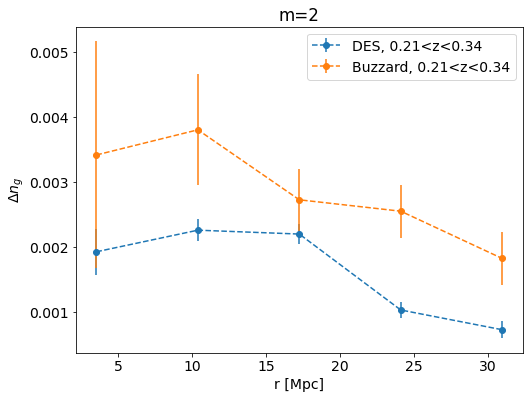

Reduced Chi-squared: 4.36


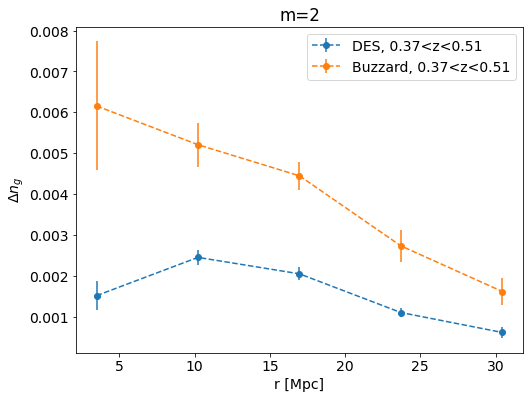

Reduced Chi-squared: 13.00


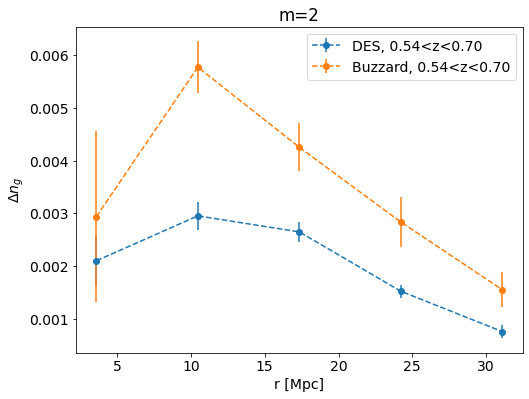

Reduced Chi-squared: 9.88


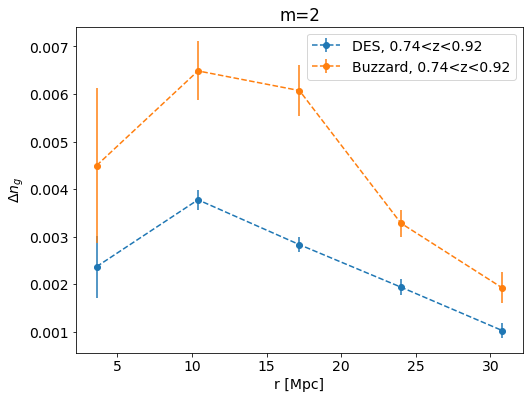

Reduced Chi-squared: 15.30


<Figure size 576x432 with 0 Axes>

In [7]:
m=2
c=0
for dbin in dbins:
    cl_dlow, cl_dhi = dbin[0], dbin[1]
    dlow   = cl_dlow-50
    dhi    = cl_dhi+50
    zlow   = z_at_value(cosmo.comoving_distance, cl_dlow*u.Mpc)
    zhi    = z_at_value(cosmo.comoving_distance, cl_dhi*u.Mpc)
    mapstr = f'DES_maglim_z_{zbins[c]}'
    desfile = actpath + "{:s}_redmapper_lambdagt20_combined_{:d}_{:d}Mpc_{:s}20pt0_orientXYUP_75pct_maglim_{:d}_{:d}Mpc_{:d}reg_m0to5_profiles.pkl".format(mapstr, cl_dlow, cl_dhi, pt_selection_str, dlow, dhi, nreg)
    deserrs   = np.load(desfile, allow_pickle=True)
    profs = np.asarray(deserrs['prof'])
    des = cpp.Stack_object(img_splits=deserrs['stacks'], profile_splits=np.transpose(profs, axes=[2,0,1]),Npks_splits=deserrs['npks_list'], rad_in_Mpc=40)
    mapstr = f'Buzzard_maglim_z_{zbins[c]}'
    buzzfile = buzzpath+ "{:s}_redmapper_lambdagt20_combined_{:d}_{:d}Mpc_{:s}20pt0_orientXYUP_75pct_maglim_{:d}_{:d}Mpc_{:d}reg_m0to5_profiles.pkl".format(mapstr, cl_dlow, cl_dhi, pt_selection_str, dlow, dhi, nreg)
    buzzerrs   = np.load(buzzfile, allow_pickle=True)
    profs = np.asarray(buzzerrs['prof'])
    buzz = cpp.Stack_object(img_splits=buzzerrs['stacks'], profile_splits=np.transpose(profs, axes=[2,0,1]),Npks_splits=buzzerrs['npks_list'], rad_in_Mpc=40)
    # remove the average for m=0
    idx_r20 = np.where(np.abs(des.r-20) == np.min(np.abs(des.r-20)))[0][0]
    buzz.avg_profiles[0] -= np.average(buzz.avg_profiles[0][idx_r20:])
    des.avg_profiles[0] -= np.average(des.avg_profiles[0][idx_r20:])
    
    # calculate the covariance matrices
    buzz.bin_and_get_stats(binsize=7)
    des.bin_and_get_stats(binsize=7)
    buzz.avg_profiles_binned[0] -= np.average(buzz.avg_profiles[0][idx_r20:])
    des.avg_profiles_binned[0] -= np.average(des.avg_profiles[0][idx_r20:])
    
    plt.errorbar(des.r_binned, des.avg_profiles_binned[m], yerr=des.errors_binned[m], fmt='o', linestyle='--', label='DES, {:.2f}<z<{:.2f}'.format(zlow.value, zhi.value))
    plt.errorbar(buzz.r_binned, buzz.avg_profiles_binned[m], yerr=buzz.errors_binned[m], fmt='o', linestyle='--', label='Buzzard, {:.2f}<z<{:.2f}'.format(zlow.value, zhi.value))
    plt.legend()
    plt.ylabel("$\Delta n_g$")
    plt.title(f"m={m}")
    plt.xlabel("r [Mpc]")
    plt.show()
    plt.clf()
    print("Reduced Chi-squared: {:.2f}".format(st.chisq(des.avg_profiles_binned[m], buzz.avg_profiles_binned[m], des.covmat_binned[m], buzz.covmat_binned[m])/(len(des.avg_profiles_binned)-1)))
    c+=1


## Compare the delta_galaxy profiles from ACT and Buzzard
The galaxy and cluster distribution is dependent on the Addgals modelling in Buzzard, so we need to check whether this is accurate before comparing with details of the $y$ profile pasting.



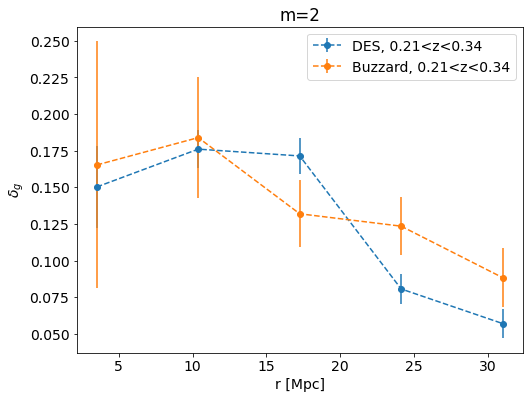

Reduced Chi-squared: 6130.92


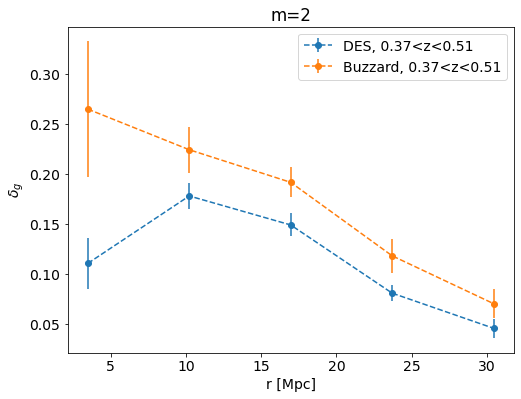

Reduced Chi-squared: 6350.51


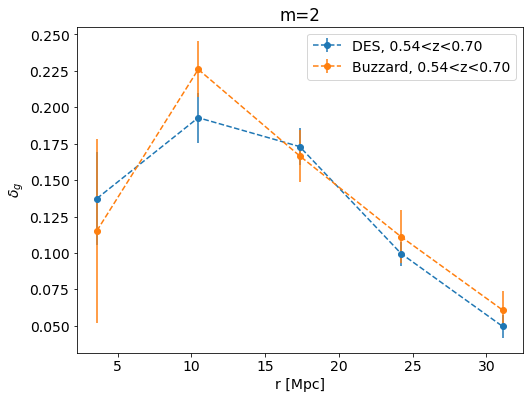

Reduced Chi-squared: 1702.66


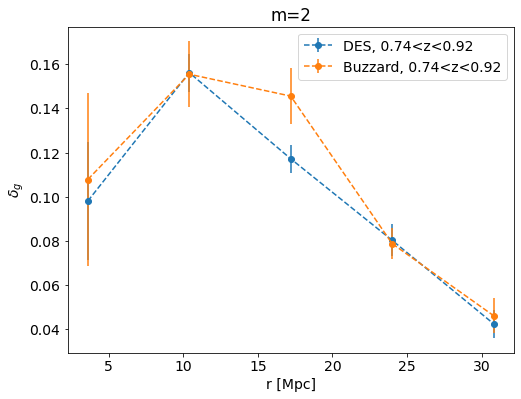

Reduced Chi-squared: 1032.04


<Figure size 576x432 with 0 Axes>

In [18]:
m=2

for c, dbin in enumerate(dbins):
    cl_dlow, cl_dhi = dbin[0], dbin[1]
    dlow   = cl_dlow-50
    dhi    = cl_dhi+50
    zlow   = z_at_value(cosmo.comoving_distance, cl_dlow*u.Mpc)
    zhi    = z_at_value(cosmo.comoving_distance, cl_dhi*u.Mpc)
    mapstr = f'DES_maglim_z_{zbins[c]}'
    desfile = actpath + "{:s}_redmapper_lambdagt20_combined_{:d}_{:d}Mpc_{:s}20pt0_orientXYUP_75pct_maglim_{:d}_{:d}Mpc_{:d}reg_m0to5_profiles.pkl".format(mapstr, cl_dlow, cl_dhi, pt_selection_str, dlow, dhi, nreg)
    deserrs   = np.load(desfile, allow_pickle=True)
    profs = np.asarray(deserrs['prof'])
    des = cpp.Stack_object(img_splits=deserrs['stacks'], profile_splits=np.transpose(profs, axes=[2,0,1]),Npks_splits=deserrs['npks_list'], rad_in_Mpc=40)
    mapstr = f'Buzzard_maglim_z_{zbins[c]}'
    buzzfile = buzzpath+ "{:s}_redmapper_lambdagt20_combined_{:d}_{:d}Mpc_{:s}20pt0_orientXYUP_75pct_maglim_{:d}_{:d}Mpc_{:d}reg_m0to5_profiles.pkl".format(mapstr, cl_dlow, cl_dhi, pt_selection_str, dlow, dhi, nreg)
    buzzerrs   = np.load(buzzfile, allow_pickle=True)
    profs = np.asarray(buzzerrs['prof'])
    buzz = cpp.Stack_object(img_splits=buzzerrs['stacks'], profile_splits=np.transpose(profs, axes=[2,0,1]),Npks_splits=buzzerrs['npks_list'], rad_in_Mpc=40)
    # remove the average for m=0
    idx_r20 = np.where(np.abs(des.r-20) == np.min(np.abs(des.r-20)))[0][0]
    buzz.avg_profiles[0] -= np.average(buzz.avg_profiles[0][idx_r20:])
    des.avg_profiles[0] -= np.average(des.avg_profiles[0][idx_r20:])
    buzz.avg_profiles=np.asarray(buzz.avg_profiles)/gmeans_buzz[c]
    des.avg_profiles=np.asarray(des.avg_profiles)/ gmeans_des[c]
    # calculate the covariance matrices
    buzz.bin_and_get_stats(binsize=7)
    des.bin_and_get_stats(binsize=7)
    buzz.avg_profiles_binned[0]
    des.avg_profiles_binned[0]
    buzz.errors_binned=np.asarray(buzz.errors_binned)/gmeans_buzz[c]
    des.errors_binned=np.asarray(des.errors_binned)/gmeans_des[c]
    plt.errorbar(des.r_binned, des.avg_profiles_binned[m], yerr=des.errors_binned[m], fmt='o', linestyle='--', label='DES, {:.2f}<z<{:.2f}'.format(zlow.value, zhi.value))
    plt.errorbar(buzz.r_binned, buzz.avg_profiles_binned[m], yerr=buzz.errors_binned[m], fmt='o', linestyle='--', label='Buzzard, {:.2f}<z<{:.2f}'.format(zlow.value, zhi.value))
    plt.legend()
    plt.ylabel("$\delta_g$")
    plt.title(f"m={m}")
    plt.xlabel("r [Mpc]")
    plt.show()
    plt.clf()
    print("Reduced Chi-squared: {:.2f}".format(st.chisq(des.avg_profiles_binned[m], buzz.avg_profiles_binned[m], des.covmat_binned[m], buzz.covmat_binned[m])/(len(des.avg_profiles_binned)-1)))
    


Try comparing $\nu$

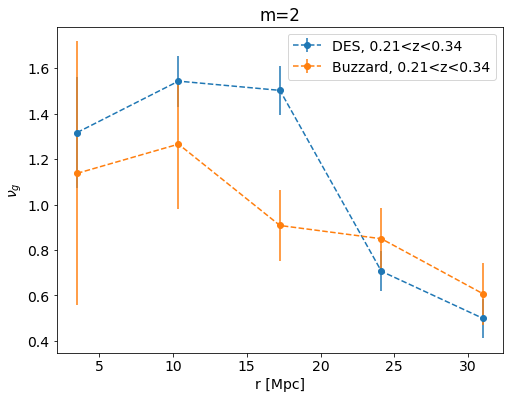

Reduced Chi-squared: 690891.10


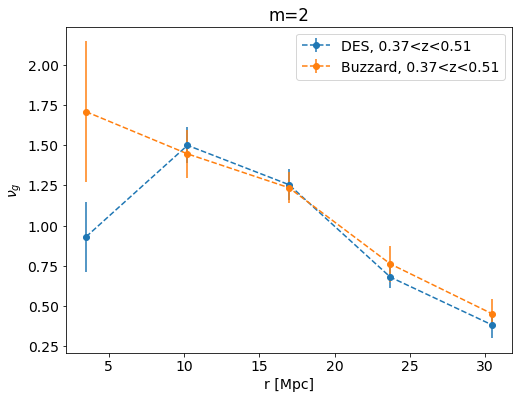

Reduced Chi-squared: 115526.74


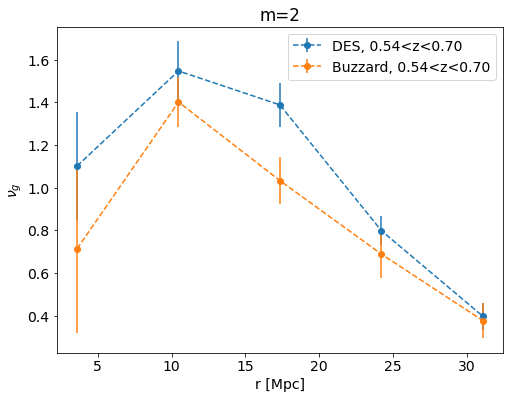

Reduced Chi-squared: 131684.17


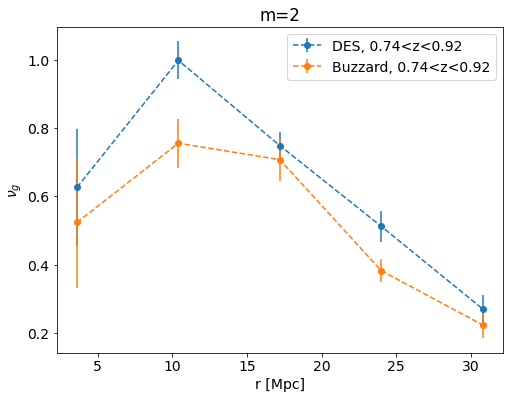

Reduced Chi-squared: 89186.56


<Figure size 576x432 with 0 Axes>

In [19]:
m=2

for c, dbin in enumerate(dbins):
    cl_dlow, cl_dhi = dbin[0], dbin[1]
    dlow   = cl_dlow-50
    dhi    = cl_dhi+50
    zlow   = z_at_value(cosmo.comoving_distance, cl_dlow*u.Mpc)
    zhi    = z_at_value(cosmo.comoving_distance, cl_dhi*u.Mpc)
    mapstr = f'DES_maglim_z_{zbins[c]}'
    desfile = actpath + "{:s}_redmapper_lambdagt20_combined_{:d}_{:d}Mpc_{:s}20pt0_orientXYUP_75pct_maglim_{:d}_{:d}Mpc_{:d}reg_m0to5_profiles.pkl".format(mapstr, cl_dlow, cl_dhi, pt_selection_str, dlow, dhi, nreg)
    deserrs   = np.load(desfile, allow_pickle=True)
    profs = np.asarray(deserrs['prof'])
    des = cpp.Stack_object(img_splits=deserrs['stacks'], profile_splits=np.transpose(profs, axes=[2,0,1]),Npks_splits=deserrs['npks_list'], rad_in_Mpc=40)
    mapstr = f'Buzzard_maglim_z_{zbins[c]}'
    buzzfile = buzzpath+ "{:s}_redmapper_lambdagt20_combined_{:d}_{:d}Mpc_{:s}20pt0_orientXYUP_75pct_maglim_{:d}_{:d}Mpc_{:d}reg_m0to5_profiles.pkl".format(mapstr, cl_dlow, cl_dhi, pt_selection_str, dlow, dhi, nreg)
    buzzerrs   = np.load(buzzfile, allow_pickle=True)
    profs = np.asarray(buzzerrs['prof'])
    buzz = cpp.Stack_object(img_splits=buzzerrs['stacks'], profile_splits=np.transpose(profs, axes=[2,0,1]),Npks_splits=buzzerrs['npks_list'], rad_in_Mpc=40)
    # remove the average for m=0
    idx_r20 = np.where(np.abs(des.r-20) == np.min(np.abs(des.r-20)))[0][0]
    buzz.avg_profiles[0] -= np.average(buzz.avg_profiles[0][idx_r20:])
    des.avg_profiles[0] -= np.average(des.avg_profiles[0][idx_r20:])
    buzz.avg_profiles=np.asarray(buzz.avg_profiles)/gmeans_buzz[c]/sigmas_buzz[c]
    des.avg_profiles=np.asarray(des.avg_profiles)/ gmeans_des[c]/sigmas_des[c]
    # calculate the covariance matrices
    buzz.bin_and_get_stats(binsize=7)
    des.bin_and_get_stats(binsize=7)
    buzz.avg_profiles_binned[0] -= np.average(buzz.avg_profiles[0][idx_r20:])
    des.avg_profiles_binned[0] -= np.average(des.avg_profiles[0][idx_r20:])
    buzz.errors_binned=np.asarray(buzz.errors_binned)/gmeans_buzz[c]/sigmas_buzz[c]
    des.errors_binned=np.asarray(des.errors_binned)/gmeans_des[c]/sigmas_des[c]
    plt.errorbar(des.r_binned, des.avg_profiles_binned[m], yerr=des.errors_binned[m], fmt='o', linestyle='--', label='DES, {:.2f}<z<{:.2f}'.format(zlow.value, zhi.value))
    plt.errorbar(buzz.r_binned, buzz.avg_profiles_binned[m], yerr=buzz.errors_binned[m], fmt='o', linestyle='--', label='Buzzard, {:.2f}<z<{:.2f}'.format(zlow.value, zhi.value))
    plt.legend()
    plt.ylabel(r"$\nu_g$")
    plt.title(f"m={m}")
    plt.xlabel("r [Mpc]")
    plt.show()
    plt.clf()
    print("Reduced Chi-squared: {:.2f}".format(st.chisq(des.avg_profiles_binned[m], buzz.avg_profiles_binned[m], des.covmat_binned[m], buzz.covmat_binned[m])/(len(des.avg_profiles_binned)-1)))
    
